# Data information

Data source: https://www.kaggle.com/datasets/abdullahkhanuet22/olx-cars-dataset

OLX Cars Dataset  contains information about used cars for sale in Pakistan available on the OLX website. 

* Key Attributes of the Dataset:

Car ID, Car Name, Make, Model, Year, KM's driven, Price, Fuel, Registration city, Car documents, Assembly, Transmission, Condition, Seller Location, Description, Car Features, Images URL's, Car Profile.


# Introduction 

My interest in used car data for sale stems from my personal interest in a car purchase with no prior knowledge on cars. I realized any new buyer needs to do market research to understand the basics of cars. My project aims to help any new buyer familiarize with unknown terms and provide an introduction to car performance and condition to understand their purchasing options. 

I want to present the basic data a website contains and allow a new buyer to derive insights that can help narrow down their selection options or give them confidence that they have a reference to understand the condition of any car they consider buying. Data is foreign to the UK with Pakistan origin, however the purpose of this project is to understand what makes a car (un)desirable in terms of their particular characteristics, for which the car origin or location is negligible.

With my analysis I want to answer:

In the market what is considered an old car?
What manufacturer and model has been more popular?
What % of cars are in which condition?
Is generally car use related to car age? 
What impact can owner profile have on car condition?
Can car story be inferred from basic metrics provided in website?
Is there a way to determine if the car has a fair price, is expensive or cheap?

 # Dataframe exploration

Basic view of the data to find out:
* Number of columns and rows
* Column types
* Summary statistics for numerical data and description of object type

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#Read the file and create a data frame
df = pd.read_csv("OLX_cars_dataset00.csv")

In [7]:
#Number of rows and columns in the data frame
df.shape

(9179, 18)

In [8]:
#Understand column types and see non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9179 entries, 0 to 9178
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Ad ID              9179 non-null   int64 
 1   Car Name           9179 non-null   object
 2   Make               9179 non-null   object
 3   Model              9179 non-null   object
 4   Year               9179 non-null   int64 
 5   KM's driven        9179 non-null   int64 
 6   Price              9179 non-null   int64 
 7   Fuel               9179 non-null   object
 8   Registration city  9179 non-null   object
 9   Car documents      9179 non-null   object
 10  Assembly           9179 non-null   object
 11  Transmission       9179 non-null   object
 12  Condition          9179 non-null   object
 13  Seller Location    9179 non-null   object
 14  Description        9179 non-null   object
 15  Car Features       9179 non-null   object
 16  Images URL's       9179 non-null   object


In [9]:
#See the data frame
df.head()

,Ad ID,Car Name,Make,Model,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission,Condition,Seller Location,Description,Car Features,Images URL's,Car Profile
0,1079071571,fresh import Passo 2021model,Toyota,Passo,2021,54000,4190000,Petrol,Unregistered,Original,Imported,Automatic,Used,"Airline Avenue, Islamabad","it's 2021 model fresh import, perfect engine s...","ABS, Air Bags, AM/FM Radio, CD Player, Cassett...",['https://images.olx.com.pk/thumbnails/4039460...,https://www.olx.com.pk/item/fresh-import-passo...
1,1080125520,Suzuki ravi,Suzuki,Ravi,2018,95000,1300000,Petrol,Karachi,Original,Local,Manual,Used,"Kahuta, Rawalpindi",Suzuki ravi 2018 col,AM/FM Radio,['https://images.olx.com.pk/thumbnails/4102504...,https://www.olx.com.pk/item/suzuki-ravi-iid-10...
2,1080748789,Suzuki bolan 2015 contact 03112271054,Suzuki,Bolan,2015,50000,800000,Petrol,Karachi,Original,Local,Manual,Used,"Lyari Expressway, Karachi",Suzuki bolan model 2015 reg 2022 ghadi me koi ...,Rear speakers,['https://images.olx.com.pk/thumbnails/4139520...,https://www.olx.com.pk/item/suzuki-bolan-2015-...
3,1076081635,Diahatsu Move 2013,Daihatsu,Move,2013,94000,2155000,Petrol,Lahore,Original,Imported,Automatic,Used,"New Amir Town, Lahore",Move Push start \nHome Used car. \nModel 2013....,"ABS, Air Bags, Air Conditioning, Alloy Rims, A...",['https://images.olx.com.pk/thumbnails/3865337...,https://www.olx.com.pk/item/diahatsu-move-2013...
4,1080812928,Suzuki Swift DLX 2011 miner tuchap,Suzuki,Swift,2011,126544,1440000,Petrol,Karachi,Original,Local,Manual,Used,"Shadman 2, Karachi",Suzuki Swift DLX\nAbS Break 100%\nengine 100%\...,"ABS, Air Conditioning, Alloy Rims, AM/FM Radio...",['https://images.olx.com.pk/thumbnails/4143509...,https://www.olx.com.pk/item/suzuki-swift-dlx-2...


In [10]:
#Get basic statistics for numeric columns
df.describe().apply(lambda s: s.apply('{0:.0f}'.format))

,Ad ID,Year,KM's driven,Price
count,9179,9179,9179,9179
mean,1079719936,2012,96570,2036814
std,2848393,6,61983,1159302
min,1019823763,1989,1,185000
25%,1080003388,2007,53000,1025000
50%,1080543299,2013,92000,1820000
75%,1080772774,2017,125000,2750000
max,1080975378,2024,533528,5000000


In [11]:
#Get basic statistics for non-numeric columns
df.describe(include = 'object')

,Car Name,Make,Model,Fuel,Registration city,Car documents,Assembly,Transmission,Condition,Seller Location,Description,Car Features,Images URL's,Car Profile
count,9179,9179,9179,9179,9179,9179,9179,9179,9179,9179,9179,9179,9179,8721
unique,7970,11,58,4,61,2,2,2,1,2768,8866,5978,8976,8524
top,Honda City,Suzuki,City IVTEC,Petrol,Lahore,Original,Local,Manual,Used,"Gulshan-e-Iqbal, Karachi",(View phone number),Air Conditioning,['https://images.olx.com.pk/thumbnails/4109495...,https://www.olx.com.pk/item/honda-city-iid-108...
freq,33,3048,649,8984,3449,9111,5999,5633,9179,166,37,239,2,2


# Data preparation and cleaning

Data frame will be cleaned and processed:

* Remove uninformative columns

In [14]:
#Keep the original data (df) and create a working data frame (wdf)

wdf = df.copy()

In [15]:
#'Car name' column removed as information is duplication and not standardized

wdf = wdf.drop('Car Name', axis = 1)

In [16]:
#'Description' column removed as information is not standardized and has duplication of other columns

wdf = wdf.drop('Description', axis = 1)

* Transform car price for ease of read

In [18]:
#Price presented as M for easy read
#'Price' column name changed for accurateness of data to 'Price (M)'

wdf['Price'] = wdf['Price']/1000000

wdf.rename(columns={"Price": "Price (M)"}, inplace = True)

* Extract car sale location information to enable further comparisons
  
'Seller Location' column is composed of region division and subdivision. Split the info in two separate columns to enable further data exploration and comparison to 'Registration city' column.

In [20]:
#Function 1 for location 

def loc_split_1(location):

    part_1 = location[0:location.find(',')]
    if len(part_1) < len(location):
        return part_1
    else:
        return location


In [21]:
#Function 2 for location 

def loc_split_2(location):

    part_2 = location[location.find(',')+2:]
    if len(part_2) < len(location):
        return part_2
    else:
        return location

In [22]:
#Seller Location split to separate City and evaluate car offer and demand availability

wdf['Seller_Location_1'] = wdf['Seller Location'].apply(loc_split_1)

wdf['Seller_Location_2'] = wdf['Seller Location'].apply(loc_split_2)

#Location column name needs changing 

wdf.rename(columns={"Seller_Location_1": "Seller_Location_Subdivision", \
                    "Seller_Location_2": "Seller_Location_Division"}, inplace = True)

Ensure that data in "Seller_Location_Subdivision" and "Seller_Location_Division" is correctby runing some tests. 

In [24]:
#To validate loc_split_1 and loc_split_2 functions generated the correct output for
#all rows I can test the ['Seller_Location_1'] and ['Seller_Location_2'] colums content.
#Seller Location column can be deleted if checks on the new columns pass.

# Check that  'Seller_Location_1' and 'Seller_Location_2' contain no commas ','  

display(wdf['Seller_Location_Division'].value_counts().sort_values(ascending=False))

incorect_div = wdf[wdf['Seller_Location_Division'].isin([' ', ',', ' ,' , ', '])]  
print("There are %g entries with a comma in 'Seller_Location_Division' column." %(len(incorect_div)))

incorect_subdiv = wdf[wdf['Seller_Location_Subdivision'].isin([' ', ',', ' ,' , ', '])]
print("There are %g entries with a comma in 'Seller_Location_Subdivision' column." %(len(incorect_subdiv)))

# Check that 'Seller_Location_1' and 'Seller_Location_2' are different for all cases/rows

same_loc = wdf['Seller_Location_Subdivision'] == wdf['Seller_Location_Division']
display(same_loc.value_counts())

Seller_Location_Division
Karachi                        2292
Lahore                         2042
Islamabad                       806
Rawalpindi                      577
Faisalabad                      427
                               ... 
Matli                             1
Jatoi                             1
Islamabad Capital Territory       1
FATA                              1
Hangu                             1
Name: count, Length: 153, dtype: int64

There are 0 entries with a comma in 'Seller_Location_Division' column.
There are 0 entries with a comma in 'Seller_Location_Subdivision' column.


False    9179
Name: count, dtype: int64

Delete originating 'Seller Location' column once data in 'Seller_Location_Division' and 'Seller_Location_Subdivision' is verified.

In [26]:
#Seller Location column can be deleted as data is available and has been reviewed to be correct
wdf = wdf.drop('Seller Location', axis = 1)

* Define car condition category to enable buyer quick car assessment
  
Currently all cars under 'Condition' column state 'used', this column could be deleted as it gives no useful data to rate cars. 

Preferably the column content can be modified to be more informative.
Cars can be categorized according to their age and km traveled to enable buyer quick car assessment.

In [28]:
# Explore 'Condition' column content

display(wdf["Condition"].value_counts())

Condition
Used    9179
Name: count, dtype: int64

'Condition' column will be replaced for an informative car classification based on use history to enable buyer quick car assessment. 

The categories are:
* Low use, for cars that travel < 12000 KM/year 
* Medium use, for cars that travel between 12000 and 16000 KM/year
* Heavy use, for cars that travel > 16000 KM/year

In [30]:
#Defining the car age and calculating KM traveled per year can help define car condition in 
#a more informative way for the buyer

wdf['Car age'] = 2024 - wdf['Year']
wdf['Distance per year'] = wdf["KM's driven"] / wdf['Car age']
wdf['Distance per year'] = wdf['Distance per year'].round()

In [31]:
#Car condition can be evaluated as a car that has had low, medium or heavy use. This information
# will replace the current Condition information, which stated 'used' for all cars listed

def condition (dist_per_year):
    use = ''
    if dist_per_year > 16000:
        use = 'Heavy use'
    elif dist_per_year < 12000:
        use= 'Low use'
    else:
        use = 'Medium use'
            
    return use

#apply the function to obtain the 'Condition' column content

wdf['Condition'] = wdf['Distance per year'].apply(condition)

* Car feature processing to enable buyer quick car assessment

'Car features' column shows car features for each car as a text string. 
It would be valuable to know the number of total car features each car has and display the new information in 'Features number' column.

In [33]:
#Car features could be presented as feature number per car to help potential buyers filter through cars.
#Create total car features number in column 'Features number' in addition to text contained in 'Car Features'.
#Having number of features for every car is helpful as allows to order or filter cars that offer more value.

def feat_count(car_features):
    commas = 0
    j = 0
    
    for i in car_features:
        if car_features[j] == ',':
                commas += 1
        j += 1
    
    #there's always one less comma than features, so add a final count to comma counter
    commas += 1
    
    return commas

#apply the function to obtain the 'Features number' column content

wdf['Features number'] = wdf['Car Features'].apply(feat_count)

It would also be useful to compile a list of all the features available amongst the cars in the dataframe.

In [35]:
#Having a list of features available amongst cars for sale would be valuable.



features_list = wdf['Car Features']

compiled_features= ''

for i in features_list:
    compiled_features += i + ', '

compiled_features = compiled_features.split(", ")
compiled_features.pop()

compiled_features = np.array(compiled_features)
compiled_features = np.unique(compiled_features).tolist()
compiled_features

['ABS',
 'AM/FM Radio',
 'Air Bags',
 'Air Conditioning',
 'Alloy Rims',
 'CD Player',
 'Cassette Player',
 'Climate Control',
 'Cool Box',
 'Cruise Control',
 'DVD Player',
 'Front Camera',
 'Front Speakers',
 'Heated Seats',
 'Immobilizer Key',
 'Keyless Entry',
 'Navigation System',
 'Power Locks',
 'Power Mirrors',
 'Power Steering',
 'Power Windows',
 'Rear AC Vents',
 'Rear Camera',
 'Rear Seat Entertainment',
 'Rear speakers',
 'Steering Switches',
 'Sun Roof',
 'USB and Auxillary Cable']

The features available amongst cars can be categorized so that cars can be evaluated against each category feature.

In [37]:
#Car features can now be classified into categories to evaluate each car against category feature.

feat_category = {'Road safety':['ABS','Air Bags'],
                 'Entertainment':['AM/FM Radio', 'CD Player', 'Cassette Player', 'DVD Player',\
                                  'Rear speakers', 'Front Speakers', 'Rear Seat Entertainment'],
                 'Temperature control':['Climate Control', 'Air Conditioning', 'Heated Seats', 'Rear AC Vents'],
                 'Added extras':['Power Steering', 'Cruise Control', 'Navigation System', \
                                 'Front Camera', 'Rear Camera', 'USB and Auxillary Cable', 'Keyless Entry', \
                                 'Power Locks', 'Power Mirrors', 'Power Windows', 'Cool Box', 'Immobilizer Key', \
                                 'Steering Switches', 'Alloy Rims', 'Sun Roof']}



Every car will be evaluated against Feature classification (created above) to answer if the car fulfills basic road safety, entertainment, temperature control or has added extras. 
It's useful to see what features are common and which are rare, to understand the cars available and buyers choices.

In [39]:
# Function feat_eval to assess listed car features against feature categories for each car. 

def feat_eval(data, category, count):
    feat_count = 0
    data = str(data)
    
    for i in range(len(feat_category[category])):
        if data.find(feat_category[category][i]) != -1: 
            feat_count += 1 
        else:
            feat_count = feat_count
    if feat_count >= count:       
        return True
    else:
        return False


In [40]:
# Application of function feat_eval. 

def apply_feat_eval(row, category, count):
    """
    Wrapper function to apply logic of feat_eval function row-wise.
    """
    return feat_eval(row, category, count)

# Apply the function for each category

for category in feat_category:
    count = 2 if category == 'Road safety' else 1  # Adjusting count based on category
    wdf[category.replace(' ', '_')] = wdf['Car Features'].apply(apply_feat_eval, args=(category, count))



# Exploratory Data Analysis

# Car description

The data is ready for exploration after obtaining the information I want to compare. 

The basic information a buyer would benefit from knowing is:

## The total number of cars available for sale

In [44]:
# Define the number of cars available for sale

cars_available = wdf.shape[0]

print(f"There are {cars_available} cars for sale")


There are 9179 cars for sale


## Percentage of cars available per make

The top three car brands for sale are Suzuki with 33.2% of cars, Honda with 19.2% of cars and Toyota with 17.5% of cars.


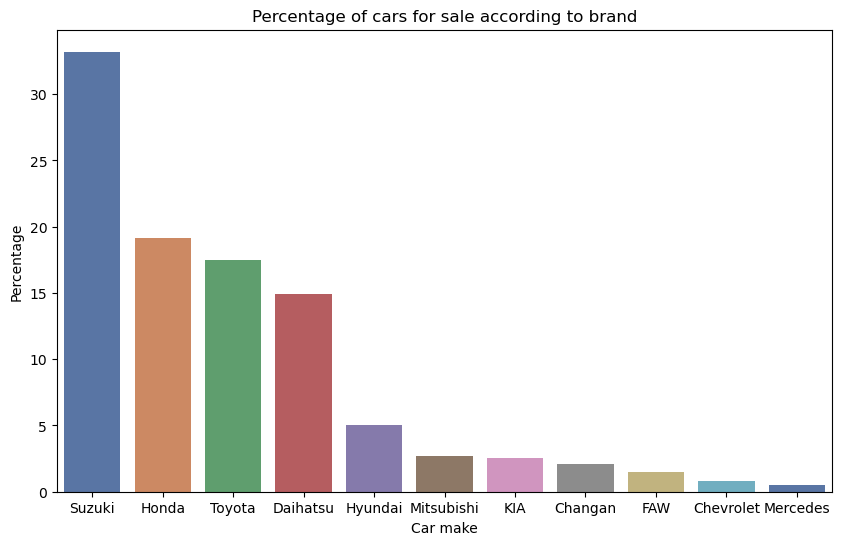

In [46]:
# Car brands available (percentage) - Bar plot

brand_data = pd.DataFrame(wdf['Make'].value_counts())
brand_data['Percentage'] = brand_data['count'] / cars_available * 100

print(\
f"The top three car brands for sale are {brand_data.index[0]} with {brand_data.iloc[0][1].round(1)}% of cars, \
{brand_data.index[1]} with {brand_data.iloc[1][1].round(1)}% of cars and \
{brand_data.index[2]} with {brand_data.iloc[2][1].round(1)}% of cars.")

plt.figure(figsize=(10, 6))
sns.barplot(x=brand_data.index, y=brand_data.Percentage, palette="deep")
plt.title('Percentage of cars for sale according to brand')
plt.xlabel('Car make')
plt.ylabel('Percentage')
plt.show()

## Percentage of cars available per model

The top three car models for sale are City IVTEC with 7.1% of cars, Alto with 6.0% of cars and Bolan with 5.9% of cars.


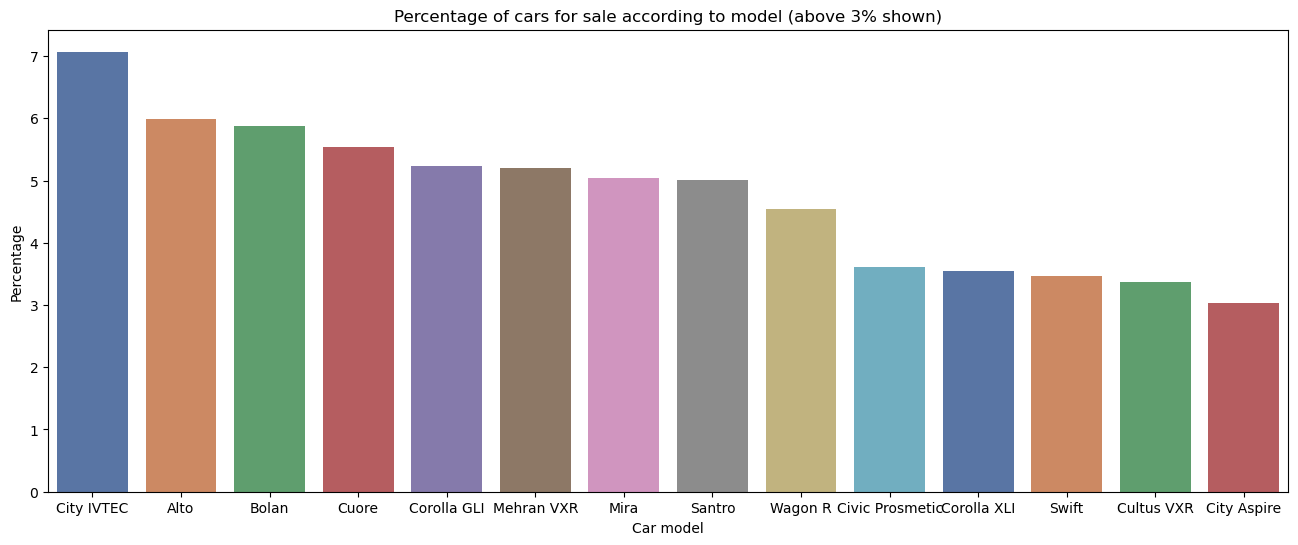

In [48]:
# Car models available (percentage) - Bar plot

model_data = pd.DataFrame((wdf['Model']).value_counts())
model_data['Percentage'] = model_data['count'] / cars_available * 100
model_data_above_3 = model_data[model_data['Percentage'] >= 3] # to reduce and simplify data

print(\
f"The top three car models for sale are {model_data.index[0]} with {model_data.iloc[0][1].round(1)}% of cars, \
{model_data.index[1]} with {model_data.iloc[1][1].round(1)}% of cars and \
{model_data.index[2]} with {model_data.iloc[2][1].round(1)}% of cars.")

plt.figure(figsize=(16, 6))
sns.barplot(x=model_data_above_3.index, y=model_data_above_3.Percentage, palette="deep")
plt.title('Percentage of cars for sale according to model (above 3% shown)')
plt.xlabel('Car model')
plt.ylabel('Percentage')
plt.show()

## Percentage of cars available per year

The majority of cars for sale are from years 2004 to 2022. The year with more availability with 6.5% of cars is 2018.


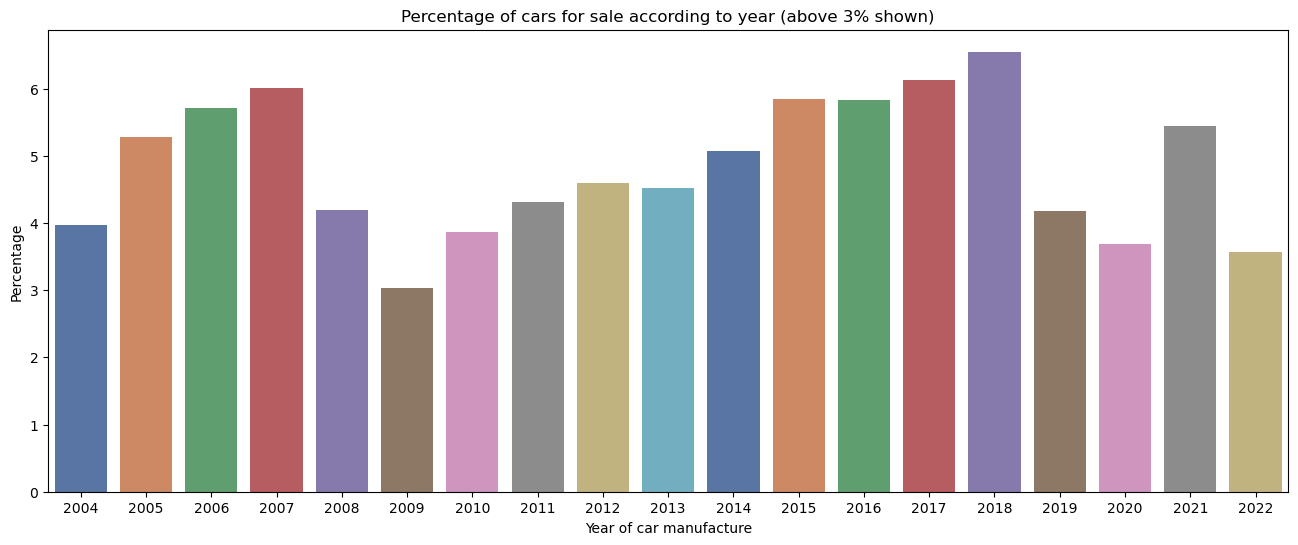

In [50]:
# Car available per year/age - Bar plot

car_year_data = pd.DataFrame(wdf['Year'].value_counts())
car_year_data = car_year_data.sort_values(by = ['Year'], ascending = True)

car_year_data['Percentage'] = car_year_data['count'] / cars_available * 100
car_year_data_above_3 = car_year_data[car_year_data['Percentage'] >= 3] # to reduce and simplify data

print(\
f"The majority of cars for sale are from years {car_year_data_above_3.index[0]} to \
{car_year_data_above_3.index[-1]}. The year with more availability with \
{car_year_data_above_3['Percentage'].round(1).max()}% of cars \
is {car_year_data_above_3.index[car_year_data_above_3['Percentage']== car_year_data_above_3['Percentage'].max()].tolist()[0]}.")

plt.figure(figsize=(16, 6))
sns.barplot(x=car_year_data_above_3.index, y=car_year_data_above_3.Percentage, palette="deep")
plt.title('Percentage of cars for sale according to year (above 3% shown)')
plt.xlabel('Year of car manufacture')
plt.ylabel('Percentage')
plt.show()

## Percentage of cars available per transmission

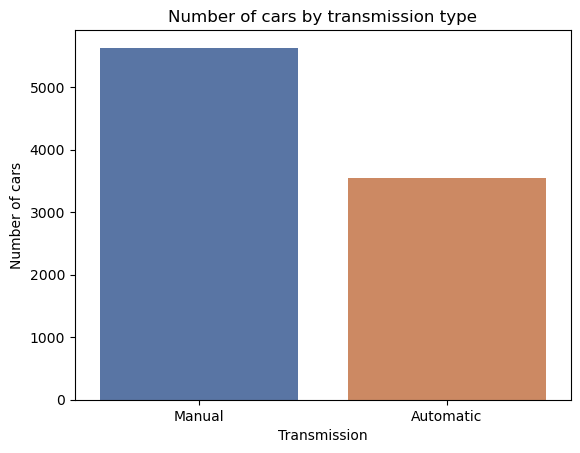

In [52]:
# Car available per transmission - Bar plot

transmission_data = wdf['Transmission'].value_counts()

#plt.figure(figsize=(6, 6))
sns.barplot(x=transmission_data.index, y=transmission_data.values, palette="deep")
plt.title('Number of cars by transmission type')
plt.xlabel('Transmission')
plt.ylabel('Number of cars')
plt.show()

## Percentage of cars available per condition

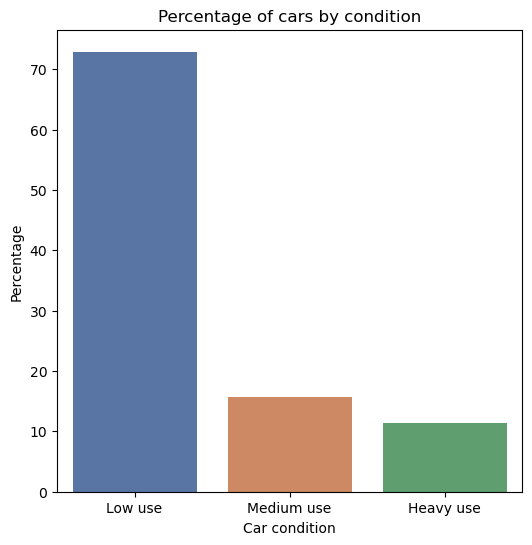

In [54]:
# Car available per condition - Bar plot

condition_data = pd.DataFrame(wdf['Condition'].value_counts())

condition_data['Percentage'] = condition_data['count'] / cars_available * 100

plt.figure(figsize=(6, 6))
sns.barplot(x=condition_data.index, y=condition_data.Percentage, palette="deep")
plt.title('Percentage of cars by condition')
plt.xlabel('Car condition')
plt.ylabel('Percentage')
plt.show()

# Car location history

In [56]:
# Cars registered per city

registration_city_data = pd.DataFrame(wdf['Registration city'].value_counts())
registration_city_data['Percentage'] = registration_city_data['count'] / cars_available * 100
registration_city_data_above_1 = registration_city_data[registration_city_data['Percentage'] >= 1]

In [57]:
# Cars for sale per city

seller_city_data = pd.DataFrame(wdf['Seller_Location_Division'].value_counts())
seller_city_data['Percentage'] = seller_city_data['count'] / cars_available * 100
seller_city_data_above_1 = seller_city_data[seller_city_data['Percentage'] >= 1]

In [58]:
# Determine the number of cars registered and sold in the same location:

reg_sell_location_same = wdf[wdf['Registration city'] == wdf['Seller_Location_Division']]

location_consistent = len(reg_sell_location_same) / len(wdf)* 100

location_consistent
print(\
f"The percentage of cars sold in their registration place is {round(location_consistent, 1)}%.")


The percentage of cars sold in their registration place is 47.3%.


In [59]:
# Data shows locations with > 1% change between registration and selling percentages.

location = registration_city_data.merge(seller_city_data, how='outer', left_index=True, right_index=True)

location.rename(columns={"count_x": "Registration_count", \
                    "Percentage_x": "Registration_percentage", \
                        "count_y": "Selling_count", \
                    "Percentage_y": "Selling_percentage"}, inplace = True)
location = location.sort_values(by=['Registration_percentage'], ascending=False)

location['Delta'] = abs(location['Registration_percentage'] - location['Selling_percentage'])

location_change_1 = location[location['Delta'] >= 1] # To simplify data

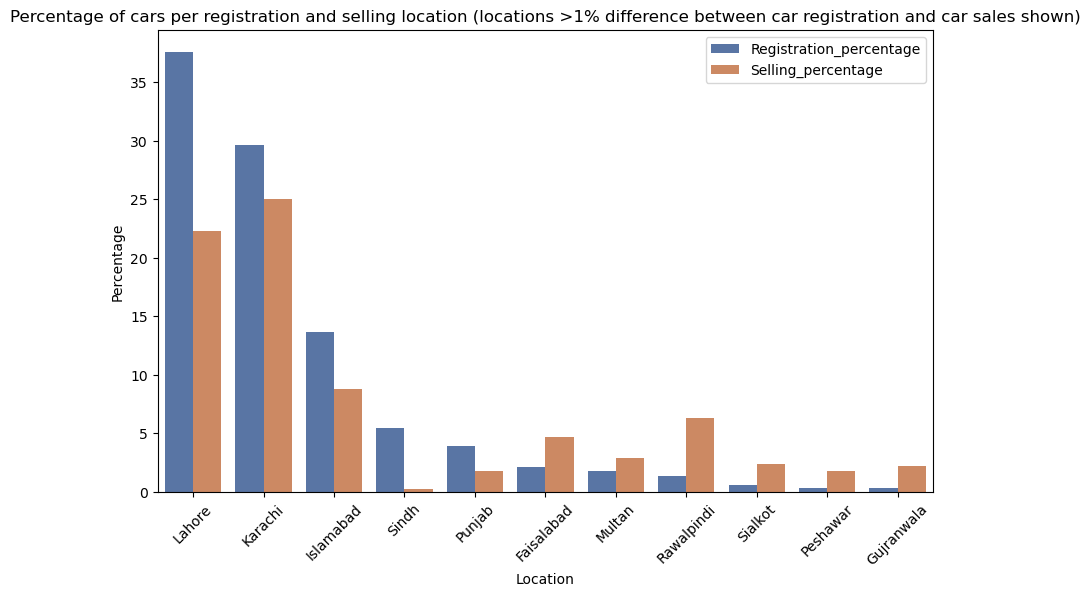

In [60]:
# Graph showing the percentage of cars by registration and selling place (locations with >1% difference between car registration and car sales). 

location_change_1_graph_sns = location_change_1.copy()

melted_location_change_1_graph_sns = location_change_1_graph_sns[["Registration_percentage", "Selling_percentage"]].reset_index().melt(id_vars='index', var_name='Car_Location', value_name='Percentage')

plt.figure(figsize=(10, 6))
sns.barplot(data=melted_location_change_1_graph_sns, x='index', y='Percentage', hue='Car_Location', palette="deep")
plt.title("Percentage of cars per registration and selling location (locations >1% difference between car registration and car sales shown)")
plt.xlabel("Location")
plt.ylabel("Percentage")
plt.legend(title=None)
plt.xticks(rotation=45)
plt.show()

In [61]:
print(\
f"The three cities with the highest car registrations are {location_change_1.index[0]}, \
{location_change_1.index[1]} and {location_change_1.index[2]}, \
with {location_change_1['Registration_percentage'].iloc[0].round(1)}, \
{location_change_1['Registration_percentage'].iloc[1].round(1)} and \
{location_change_1['Registration_percentage'].iloc[2].round(1)} % of cars.")

print(\
f"The three cities with the highest car sale offerings are {location_change_1.index[0]}, \
{location_change_1.index[1]} and {location_change_1.index[2]}, \
with {location_change_1['Selling_percentage'].iloc[0].round(1)}, \
{location_change_1['Selling_percentage'].iloc[1].round(1)} and \
{location_change_1['Selling_percentage'].iloc[2].round(1)} % of cars.")

The three cities with the highest car registrations are Lahore, Karachi and Islamabad, with 37.6, 29.6 and 13.7 % of cars.
The three cities with the highest car sale offerings are Lahore, Karachi and Islamabad, with 22.2, 25.0 and 8.8 % of cars.


In [62]:
# Determine the number of cars that are not registered

print(\
f"The percentage of unregistered cars for sale is {location.loc['Unregistered'][1].round(1)}% of cars.")

The percentage of unregistered cars for sale is 1.2% of cars.


# Correlation of car characteristics with car price

To determine what is driving car price I will make a correlation analysis to understand car characteristics associated with price.
I believe car condition, car age, car features and car distance traveled  should relate to price.

Other characteristics that may drive price are registration and selling location, brand, model and fuel.

In [64]:
#Create a correlation matrix of variables to determine if there's an effect with car price.

wdf_corr = wdf.copy()
wdf_corr = wdf_corr.drop(['Ad ID', 'Make', 'Model', 'Car age', 'Fuel', 'Registration city', 'Car documents', 'Assembly', 'Transmission', \
                          'Condition', 'Car Features', "Images URL's", 'Car Profile', 'Seller_Location_Subdivision', 'Seller_Location_Division'] , axis = 1)
correlations = wdf_corr.corr()

In [65]:
correlations

,Year,KM's driven,Price (M),Distance per year,Features number,Road_safety,Entertainment,Temperature_control,Added_extras
Year,1.000000,-0.380755,0.680901,0.405647,0.199157,0.288164,0.022673,0.104281,0.025462
KM's driven,-0.380755,1.000000,-0.188484,0.437426,0.021794,-0.082567,0.029299,0.067435,0.076273
Price (M),0.680901,-0.188484,1.000000,0.313026,0.509473,0.466477,0.087414,0.277516,0.195249
Distance per year,0.405647,0.437426,0.313026,1.000000,0.128799,0.122810,0.022926,0.101020,0.076218
Features number,0.199157,0.021794,0.509473,0.128799,1.000000,0.580017,0.458373,0.522960,0.490497
Road_safety,0.288164,-0.082567,0.466477,0.122810,0.580017,1.000000,0.165259,0.322063,0.215778
Entertainment,0.022673,0.029299,0.087414,0.022926,0.458373,0.165259,1.000000,0.274886,0.258222
Temperature_control,0.104281,0.067435,0.277516,0.101020,0.522960,0.322063,0.274886,1.000000,0.294063
Added_extras,0.025462,0.076273,0.195249,0.076218,0.490497,0.215778,0.258222,0.294063,1.000000


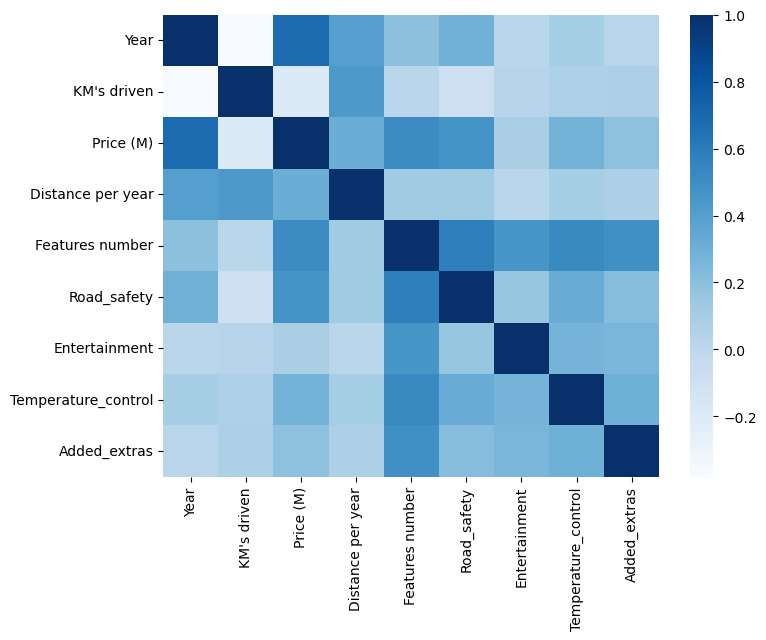

In [66]:
plt.figure(figsize = (8,6))
sns.heatmap(correlations, cmap = "Blues");

The correlation analysis indicates that car price relates to car registration year, to the number of features a car has and if these features cover safety features.
I expected car price would relate to total KM's driven or to traveled distance per year, but car price correlation to these factors is weak.

A buyer searching for cars in the OLX website can expect car year to dictate car price over other characteristics. 

# Car trends over time

## Car brand popularity

In [70]:
car_evolution = wdf[['Make', 'Model' , 'Year', 'Price (M)', 'Transmission', 'Condition']]

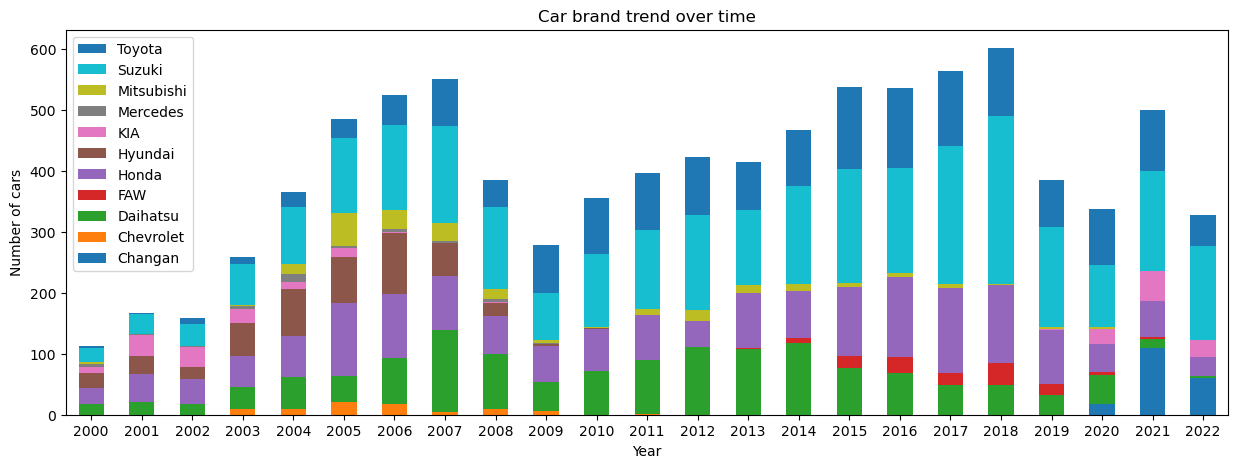

In [71]:
car_evolution_make = car_evolution.groupby(['Year', 'Make'])['Condition'].count().unstack('Make')
car_evolution_make_red = car_evolution_make[2:-2]
car_evolution_make_red


car_evolution_make_red.plot(kind="bar", stacked = True)
plt.gcf().set_size_inches(15, 5)
plt.title("Car brand trend over time")
plt.xlabel("Year")
plt.ylabel("Number of cars")
plt.legend(title=None, reverse=True)
plt.xticks(rotation=0)
plt.show()

The most popular car brands is Suzuki. 
Toyota and Honda maintain market presence among buyers. 
Some manufactures such as Hyundai and Chevrolet are no longer popular after the year 2009.

## Car transmission popularity

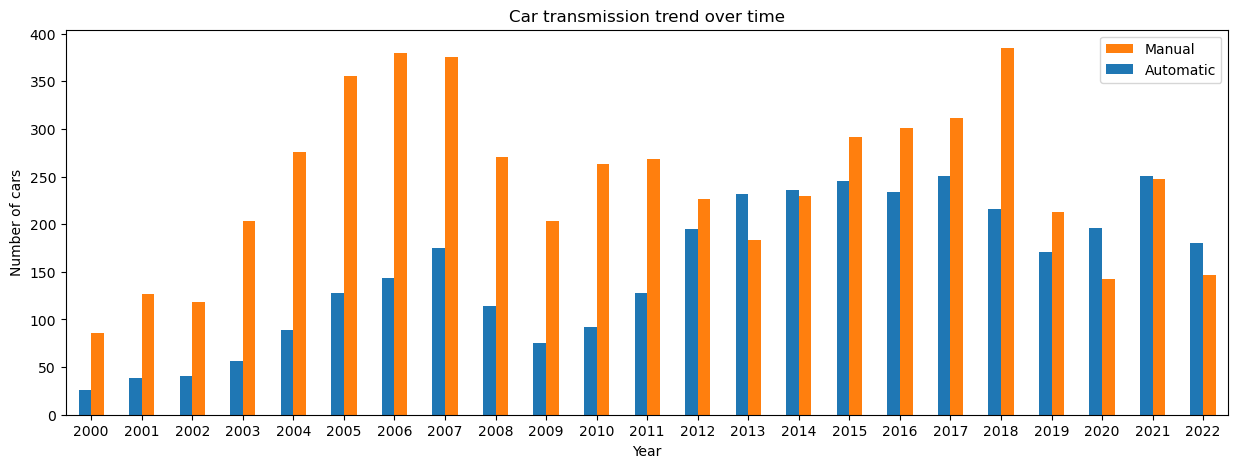

In [74]:
car_evolution_transmission = car_evolution.groupby(['Year', 'Transmission'])['Condition'].count().unstack('Transmission')
car_evolution_transmission_red = car_evolution_transmission[2:-2]


car_evolution_transmission_red.plot(kind="bar")
plt.gcf().set_size_inches(15, 5)
plt.title("Car transmission trend over time")
plt.xlabel("Year")
plt.ylabel("Number of cars")
plt.legend(title=None, reverse=True)
plt.xticks(rotation=0)
plt.show()

Car transmission popularity was greatly inclined towards Manual until the year 2011, but Automatic transmission is equally popular in recent years.

## Car condition

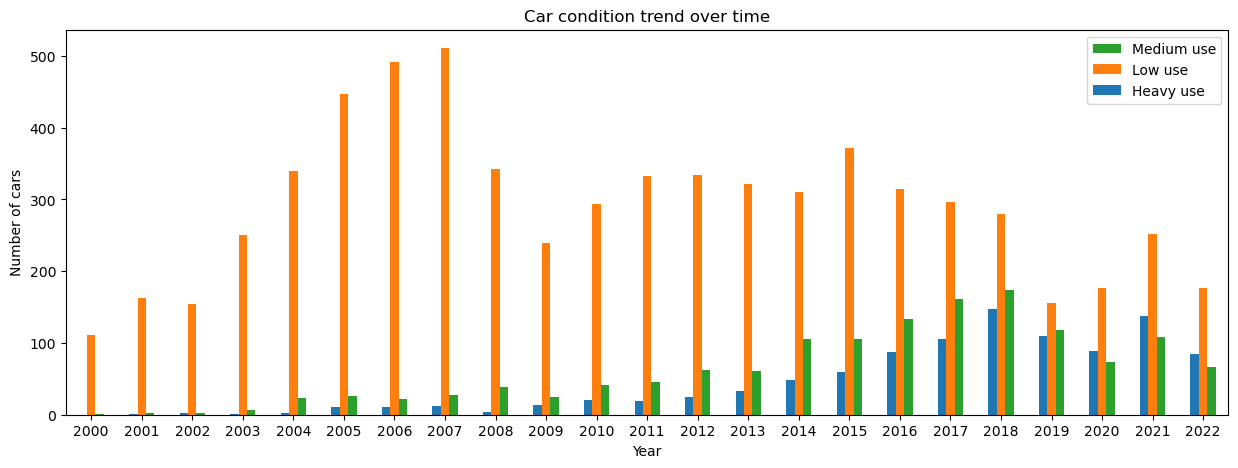

In [77]:
car_evolution_condition = car_evolution.groupby(['Year', 'Condition'])['Condition'].count().unstack('Condition')
car_evolution_condition_red = car_evolution_condition[2:-2]


car_evolution_condition_red.plot(kind="bar")
plt.gcf().set_size_inches(15, 5)
plt.title("Car condition trend over time")
plt.xlabel("Year")
plt.ylabel("Number of cars")
plt.legend(title=None, reverse=True)
plt.xticks(rotation=0)
plt.show()

Older cars tend to have had Low use traveling < 12000 KM/year. 
From year 2004 Medium use cars traveling between 12000 and 16000 KM/year appear and since the year 2014 Heavy use cars that travel > 16000 KM/year are more common.

# Car price exploration

## Car price per manufacturer

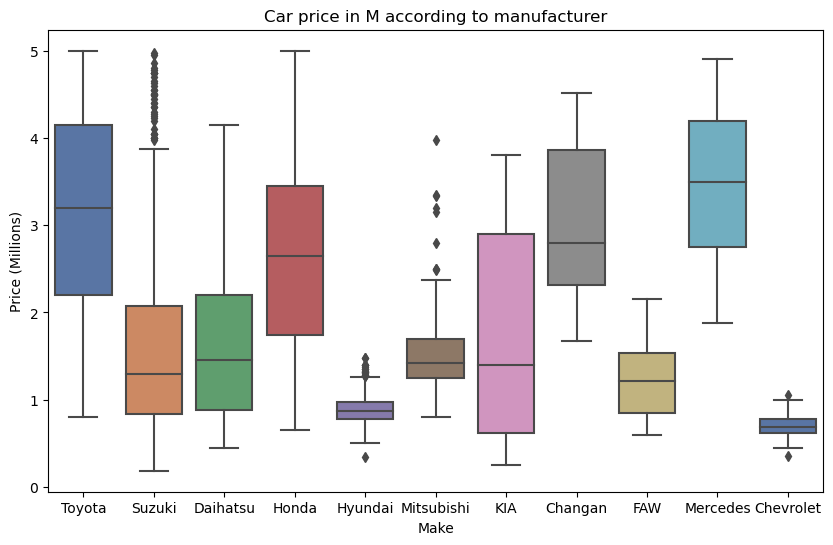

In [81]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=car_evolution, x='Make', y='Price (M)', palette="deep")
plt.title("Car price in M according to manufacturer")
plt.xlabel("Make")
plt.ylabel("Price (Millions)")
plt.show()


Car price varies among manufacturers. 
Mercedes is the most expensive brand, followed by Toyota. 
Suzuki brand seems to have lower prices, but many Suzuki cars have high prices for the brand. The same is shown for Mitsubishi cars.
Chevrolet and Hyundai have the lowest prices, probably related to these cars loosing popularity among buyers.

## Car price per car condition

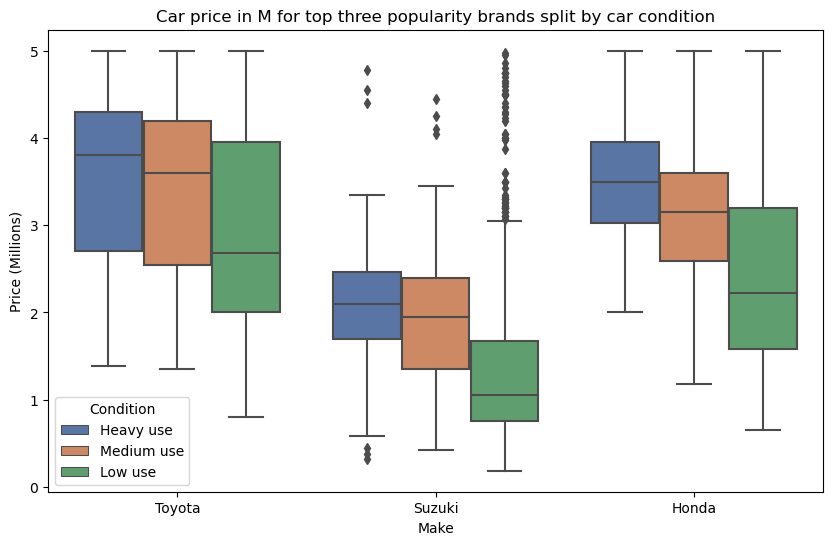

In [84]:
msk_top_3_brands = car_evolution["Make"].isin(["Suzuki", "Toyota", "Honda"])

plt.figure(figsize=(10, 6))
sns.boxplot(data=car_evolution.loc[msk_top_3_brands], x='Make', y='Price (M)', hue='Condition', palette="deep")
plt.title("Car price in M for top three popularity brands split by car condition")
plt.xlabel("Make")
plt.ylabel("Price (Millions)")
plt.show()

Looking a the price for the top three car brands Toyota, Suzuki and Honda we can see that heavily used cars are more expensive than medium and low use cars.
Pricing pattern again confirms that contrary to  what a buyer expects these cars are priced by year mainly and don't evaluate all important parameters such as KM's traveled.
Another important finding is that some Suzuki cars are priced considerably above average for the brand. 
Buyers should carefully consider which car they prefer and evaluate if the car price seems adequate to its characteristics.

## Car price per year

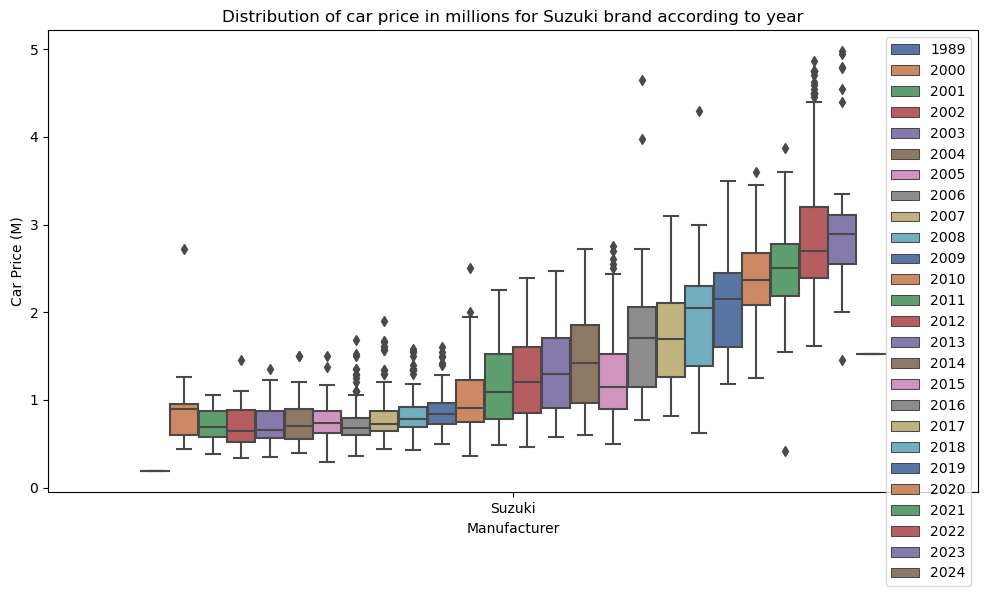

In [87]:
msk_suzuki = car_evolution["Make"].isin(["Suzuki"])

plt.figure(figsize=(12, 6))
sns.boxplot(data=car_evolution.loc[msk_suzuki], x='Make', y='Price (M)', hue='Year', palette="deep")
plt.title("Distribution of car price in millions for Suzuki brand according to year")
plt.xlabel("Manufacturer")
plt.ylabel("Car Price (M)")
plt.legend(title=None)
plt.show()

A breakdown of car price for Suzuki cars by year shows that year causes car price to increase. This pricing tendency is also seen for Toyota and Honda.

# Conclusion

The data I worked on contains car adverts information published in the OLX website. I analysed the data to respond initial questions a new buyer without car knowledge may have while considering cars to make a purchase. 

The analysis would allow a new buyer to derive insights that can help narrow down their selection options or give them confidence that they have a reference to understand the condition of any car they consider buying. 

In addition to answering the initial questions the information was expanded to allow the buyer to identify if a car is (un)desirable in terms of their particular characteristics, for example stating if the car has safety features or what the car condition is based on KM's driven.


* Exploration reveals that the most prevalent car make for sale is: Suzuki
* Exploration reveals that the most prevalent car model for sale is: City IVTEC
* Exploration reveals that the most expensive brand is: Mercedes
* Exploration reveals that car price is defined based on: Registration year
* A buyer is adviced to consider carefully the car they consider buying as some cars in this database are priced considerably above average for the manufacturing year and brand.

Further analysis can be done on Suzuki brand to explore the most expensive cars seen as outliers to understand what is driving the cost.